<a href="https://colab.research.google.com/github/oprostep/2024-Spring-DS/blob/main/240613_DS_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importing & Setting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns" ,None)

In [2]:
targetUrl = "https://raw.githubusercontent.com/oprostep/2024-Spring-DS/main/smartphone_cleaned_v5.csv"

# Parsing
df = pd.read_csv(targetUrl, sep=',', dtype={'fast_charging_available': bool, 'extended_memory_available':bool})
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,True,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,False,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,True,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,True,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,True,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,True,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,True,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,True,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,True,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,False,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    bool   
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

object와 bool 항목은 범주형 자료이므로 회귀분석을 위해선 변환해줄 필요가 있다.

<Axes: >

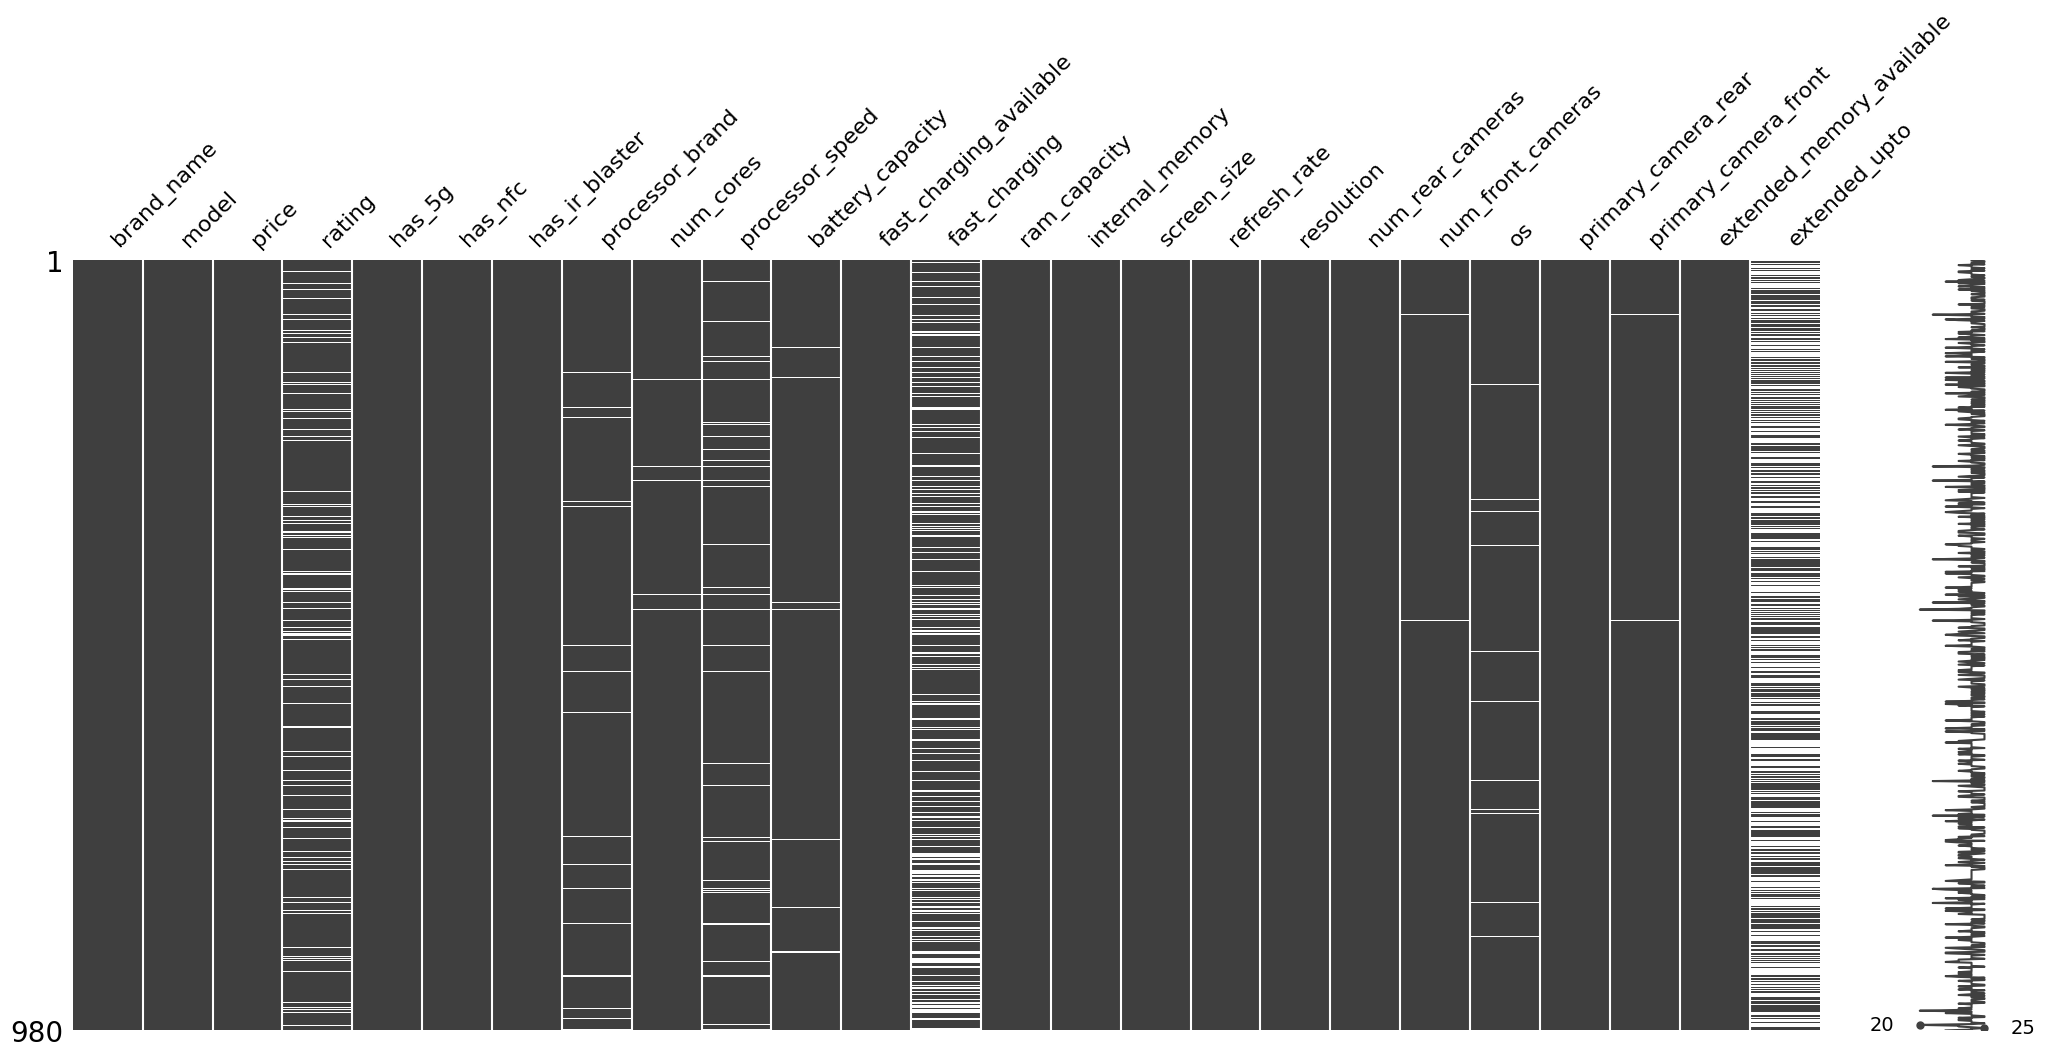

In [4]:
import missingno as msno

msno.matrix(df)

결측치가 존재하는 항목 다수 확인 가능

# 1. EDA

In [5]:
df.drop(columns='rating', inplace=True)

Target : 'price'

Features : other attributes

Drop : 'rating'

이렇게 설정한다.

rating의 경우 Target으로 사용이 가능하지만, 회귀분석에선 price에 집중하기위해 배제하기로 한다.

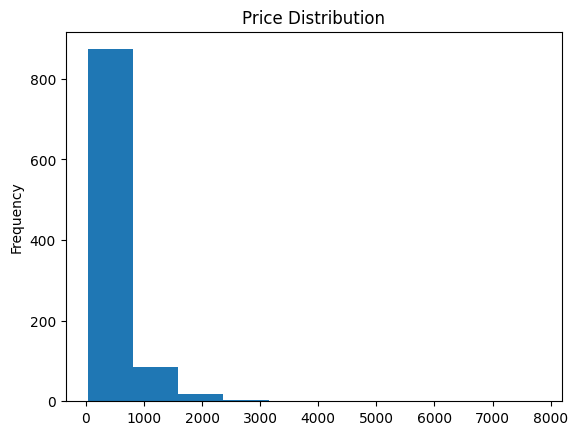

In [6]:
df['price'] = round(df['price']*0.012, 2) #INR to USD
df['price'].plot(kind='hist', title='Price Distribution');

In [7]:
high_cost_devices = df[df['price']>2500]  # 2500 USD (스마트폰 치고는 너무 비싼 가격) 이상의 제품들을 걸러낸다
high_cost_devices

,brand_name,model,price,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,7800.00,False,True,False,snapdragon,8.0,1.50,2275.0,False,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,False,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,2879.99,False,True,True,snapdragon,8.0,3.20,4700.0,True,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,True,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,5760.00,False,True,False,snapdragon,8.0,2.80,4000.0,True,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,False,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,2579.88,True,True,True,kirin,8.0,2.86,4500.0,True,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,True,256.0


In [8]:
df.drop(high_cost_devices.index, axis=0, inplace=True)

확인 결과 Signature Edition, Porsche Design 등 시그니처 에디션이거나 한정판인 제품들이다.


이런 제품들은 프리미엄이 붙어서 비싸지만 실제 성능은 비슷한 시기의 제품들과 큰 차이가 없기에, 모델의 적합도를 올리기 위해 제거해준다.

In [9]:
def remove_outliers_based_on_IQR(df, column_name, plot_hist=False):
    if plot_hist:
        fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,3))
        _, bins,_ = axs[0].hist(df[column_name])
        axs[0].title.set_text('With outliers')
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    higher_limit = Q3 + 1.5*IQR
    print(f'For column: {column_name}\nQ1 = {Q1}, Q3 = {Q3}, IQR = {IQR} \nlower_limit = {lower_limit}, higher_limit = {higher_limit}')
    previous_rows_number = df.shape[0]
    df.drop( df[(df[column_name]<lower_limit) | (df[column_name]>higher_limit)].index, axis=0, inplace=True)
    print(f"{previous_rows_number - df.shape[0]} rows have been deleted.")
    if plot_hist:
        axs[1].hist(df[column_name], bins=bins)
        axs[1].title.set_text('Without outliers')

For column: price
Q1 = 155.99, Q3 = 419.99, IQR = 264.0 
lower_limit = -240.01, higher_limit = 815.99
103 rows have been deleted.


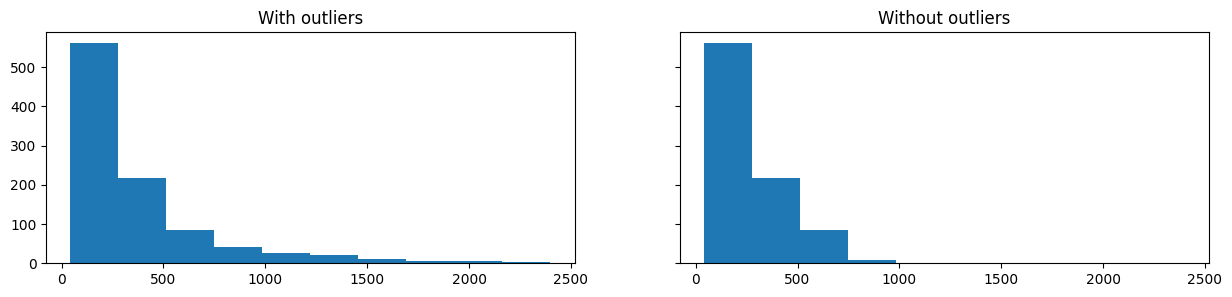

In [10]:
remove_outliers_based_on_IQR(df, 'price', plot_hist=True)

For column: battery_capacity
Q1 = 4500.0, Q3 = 5000.0, IQR = 500.0 
lower_limit = 3750.0, higher_limit = 5750.0
106 rows have been deleted.


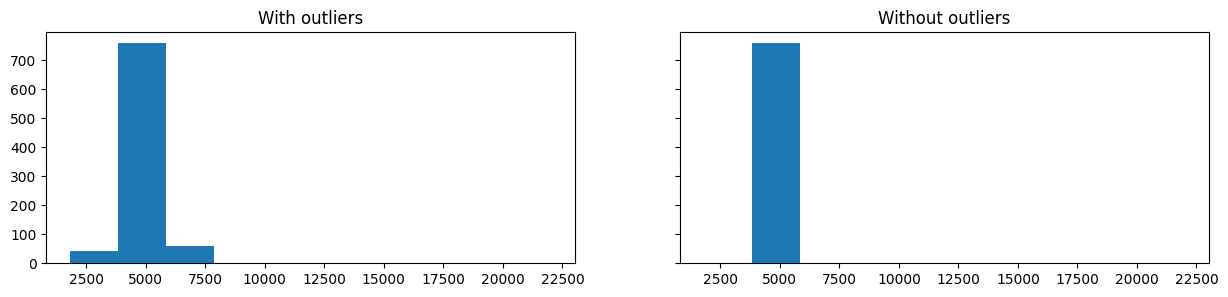

In [11]:
remove_outliers_based_on_IQR(df, 'battery_capacity', plot_hist=True)

In [12]:
df_imputed = df.copy()

현재 DataFrame은 그대로 보존한채,

회귀분석용으로 사용할 전처리된 데이터인 df_imputed DataFrame을 df를 기반으로 생성한다.

In [13]:
price = ['price']
brand_features = ['brand_name', 'model', 'os']
processor_features = ['processor_brand', 'num_cores', 'processor_speed']
battery_features = ['battery_capacity','fast_charging_available','fast_charging']
memory_features = ['ram_capacity','internal_memory','extended_memory_available','extended_upto']
screen_features = ['screen_size','refresh_rate','resolution']
cameras_features = ['num_rear_cameras', 'primary_camera_rear','num_front_cameras', 'primary_camera_front']
extra_features = ['has_5g', 'has_nfc', 'has_ir_blaster']

Feature들이 워낙 많기때문에, 이를 총 7가지 범주 + price 와 rating으로 묶는다.

이후 범주단위로 price와의 관계를 분석하고, 범주 내 feature들을 전처리한다.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
def distribution_imputer(feature):
  distribution = df_imputed[feature].value_counts(normalize=True)
  impu_val = np.random.choice(distribution.index, size = df_imputed[feature].isna().sum(), p = distribution.values)
  df_imputed.loc[df_imputed[df_imputed[feature].isna()].index, feature] = impu_val

## brand_features

### brand_name

In [16]:
result = le.fit_transform(df_imputed['brand_name'])
df_imputed['brand_name'] = result

In [17]:
#brand_features.remove('brand_name')
#df_imputed.drop(columns='brand_name', inplace=True)

### model

In [18]:
# 모델명은 고유값이므로 제거해줌
brand_features.remove('model')
df_imputed.drop(columns='model', inplace=True)

### os

In [19]:
# 확인해본 결과 os가 기록되지 않은 데이터들은 전부 안드로이드 기반 운영체제를 사용함
df_imputed['os'] = df_imputed['os'].fillna('android')

In [20]:
result = le.fit_transform(df_imputed['os'])
df_imputed['os'] = result

In [21]:
#brand_features.remove('os')
#df_imputed.drop(columns='os', inplace=True)

## processor_features

### processor_brand

In [22]:
df_imputed['processor_brand'] = df_imputed['processor_brand'].fillna('snapdragon')

In [23]:
result = le.fit_transform(df_imputed['processor_brand'])
df_imputed['processor_brand'] = result

In [24]:
#processor_features.remove('processor_brand')
#df_imputed.drop(columns='processor_brand', inplace=True)

### num_cores

In [25]:
distribution_imputer('num_cores')

### processor_speed

In [26]:
distribution_imputer('processor_speed')

## battery_features

### battery_capacity

In [27]:
distribution_imputer('battery_capacity')

### fast_charging_available

In [28]:
result = le.fit_transform(df_imputed['fast_charging_available'])
df_imputed['fast_charging_available'] = result

In [29]:
#battery_features.remove('fast_charging_available')
#df_imputed.drop(columns='fast_charging_available', inplace=True)

### fast_charging

In [30]:
result = le.fit_transform(df_imputed['fast_charging'])
df_imputed['fast_charging'] = result

## memory_features

### ram_capacity


### internal_memory

### extended_memory_available

In [31]:
result = le.fit_transform(df_imputed['extended_memory_available'])
df_imputed['extended_memory_available'] = result

### extended_upto

In [32]:
df_imputed['extended_upto'] = df_imputed['extended_upto'].fillna(0)

## screen_features

### screen_size

### refresh_rate

### resolution

In [33]:
# object(너비x높이) 로 구현된 resolution을 width 와 height feature로 분리
screen_features = screen_features + ['width', 'height']
screen_features.remove('resolution')
df_imputed[['width','height']] = df_imputed[['resolution']].apply(func=(lambda x: x['resolution'].split("x")), axis=1, result_type='expand')
df_imputed['width'] = df_imputed['width'].astype(str).astype(int)
df_imputed['height'] = df_imputed['height'].astype(str).astype(int)

In [34]:
# df에도 똑같은 액션 적용
df[['width','height']] = df[['resolution']].apply(func=(lambda x: x['resolution'].split("x")), axis=1, result_type='expand')
df['width'] = df['width'].astype(str).astype(int)
df['height'] = df['height'].astype(str).astype(int)

## cameras_features

### num_rear_cameras

### primary_camera_rear

### num_front_cameras

In [35]:
distribution_imputer('num_front_cameras')

### primary_camera_front

In [36]:
distribution_imputer('primary_camera_front')

## extra_features

### has_5g

In [37]:
result = le.fit_transform(df_imputed['has_5g'])
df_imputed['has_5g'] = result

In [38]:
#extra_features.remove('has_5g')
#df_imputed.drop(columns='has_5g', inplace=True)

### has_nfc

In [39]:
result = le.fit_transform(df_imputed['has_nfc'])
df_imputed['has_nfc'] = result

In [40]:
#extra_features.remove('has_nfc')
#df_imputed.drop(columns='has_nfc', inplace=True)

### has_ir_blaster

In [41]:
result = le.fit_transform(df_imputed['has_ir_blaster'])
df_imputed['has_ir_blaster'] = result

In [42]:
#extra_features.remove('has_ir_blaster')
#df_imputed.drop(columns='has_ir_blaster', inplace=True)

## Summary

In [43]:
X = df_imputed[brand_features+processor_features+battery_features+memory_features+screen_features+cameras_features+extra_features]
print(X.info())
y = df_imputed[price]
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 767 non-null    int64  
 1   os                         767 non-null    int64  
 2   processor_brand            767 non-null    int64  
 3   num_cores                  767 non-null    float64
 4   processor_speed            767 non-null    float64
 5   battery_capacity           767 non-null    float64
 6   fast_charging_available    767 non-null    int64  
 7   fast_charging              767 non-null    int64  
 8   ram_capacity               767 non-null    float64
 9   internal_memory            767 non-null    float64
 10  extended_memory_available  767 non-null    int64  
 11  extended_upto              767 non-null    float64
 12  screen_size                767 non-null    float64
 13  refresh_rate               767 non-null    int64  
 14 

결측치, object, bool이 존재하지 않는 데이터가 완성되었다.

# 2. Regularization

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Regression & RMSE, MAE, R2 value comparison

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def evaluate_regr(y, pred):
    mse = mean_squared_error(y, pred)
    rmse_val = np.sqrt(mse)
    mae_val = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,5),round(mae_val,5),round(r2,5)))

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1)
lasso_reg = Lasso(alpha=0.1)
tree_reg = DecisionTreeRegressor(random_state=1)
forest_reg = RandomForestRegressor(n_estimators=100,random_state=1)

In [47]:
lr_reg.fit(X_train ,y_train)
y_pred = lr_reg.predict(X_test)
evaluate_regr(y_test, y_pred)

RMSE : 79.95251 | MAE : 58.70535 | r2 : 0.76768 


In [48]:
ridge_reg.fit(X_train ,y_train)
y_pred = ridge_reg.predict(X_test)
evaluate_regr(y_test, y_pred)

RMSE : 79.925 | MAE : 58.68995 | r2 : 0.76784 


In [49]:
lasso_reg.fit(X_train ,y_train)
y_pred = lasso_reg.predict(X_test)
evaluate_regr(y_test, y_pred)

RMSE : 80.20982 | MAE : 58.94209 | r2 : 0.76618 


In [50]:
tree_reg.fit(X_train ,y_train)
y_pred = tree_reg.predict(X_test)
evaluate_regr(y_test, y_pred)

RMSE : 89.88473 | MAE : 56.43413 | r2 : 0.70638 


In [51]:
forest_reg.fit(X_train ,y_train.values.ravel())
y_pred = forest_reg.predict(X_test)
evaluate_regr(y_test, y_pred)

RMSE : 69.35515 | MAE : 45.72118 | r2 : 0.82519 


# 4. Hyperparameter tuning on Ridge, Lasso, Randomforest

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = [
    {'alpha': [0, 0.05, 0.1, 0.5, 1, 5]},
]

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print('best_params_: ', grid_search.best_params_)
cvres = grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)

best_params_:  {'alpha': 1}
0.7556218423892992 {'alpha': 0}
0.7561853244443204 {'alpha': 0.05}
0.7567010978884509 {'alpha': 0.1}
0.759547130403445 {'alpha': 0.5}
0.7611265280099208 {'alpha': 1}
0.7549193590050122 {'alpha': 5}


In [54]:
import warnings
warnings.filterwarnings(action='ignore')

param_grid = [
    {'alpha': [0, 0.05, 0.1, 0.5, 1]},
    ]

grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,
                          scoring='r2',
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print ('best_params_: ', grid_search.best_params_)
cvres = grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)

best_params_:  {'alpha': 0.5}
0.7556218423892991 {'alpha': 0}
0.7570742419681358 {'alpha': 0.05}
0.7580156110387263 {'alpha': 0.1}
0.7580315854557719 {'alpha': 0.5}
0.7490876194169772 {'alpha': 1}


In [55]:
param_grid = [
    {'n_estimators': [30, 50, 70, 100], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features':[2,3,4] }
    ]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print ('best_params_: ', grid_search.best_params_)
cvres = grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)

best_params_:  {'max_features': 4, 'n_estimators': 50}
-4650.911073210786 {'max_features': 2, 'n_estimators': 30}
-4566.625747685565 {'max_features': 2, 'n_estimators': 50}
-4518.09303570607 {'max_features': 2, 'n_estimators': 70}
-4445.819325835893 {'max_features': 2, 'n_estimators': 100}
-4382.506573317575 {'max_features': 4, 'n_estimators': 30}
-4260.873108153642 {'max_features': 4, 'n_estimators': 50}
-4310.322198228233 {'max_features': 4, 'n_estimators': 70}
-4309.187576543407 {'max_features': 4, 'n_estimators': 100}
-4491.481023752072 {'max_features': 6, 'n_estimators': 30}
-4410.4286263066615 {'max_features': 6, 'n_estimators': 50}
-4412.447015070059 {'max_features': 6, 'n_estimators': 70}
-4359.841324769188 {'max_features': 6, 'n_estimators': 100}
-4509.631169808768 {'max_features': 8, 'n_estimators': 30}
-4401.3502670920225 {'max_features': 8, 'n_estimators': 50}
-4420.016988556842 {'max_features': 8, 'n_estimators': 70}
-4476.101135502075 {'max_features': 8, 'n_estimators': 1

In [56]:
from sklearn.model_selection import cross_val_score

def display_scores(model):
    scores = cross_val_score(model, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=5)
    model_rmse_scores = np.sqrt(-scores)
    print('###', model.__class__.__name__, '###')
    print("점수:", model_rmse_scores)
    print("평균:", model_rmse_scores.mean())
    print("표준편차:", model_rmse_scores.std())
    print()

for model in [lr_reg, ridge_reg, lasso_reg, tree_reg, forest_reg]:
    display_scores(model)

### LinearRegression ###
점수: [ 97.6262227   67.44449274 102.5894644   86.13233289  89.00628196]
평균: 88.5597589373788
표준편차: 12.091150870011598

### Ridge ###
점수: [ 97.25430144  67.17078933 101.58479711  83.5583263   89.00933089]
평균: 87.71550901412013
표준편차: 12.036505832489759

### Lasso ###
점수: [ 96.2631395   66.99693701 102.08790883  85.06194996  89.0945262 ]
평균: 87.90089230091921
표준편차: 11.980470096478669

### DecisionTreeRegressor ###
점수: [ 98.57155159  59.23219477  99.22211299 109.64215428 100.1817617 ]
평균: 93.3699550687742
표준편차: 17.537823203094696

### RandomForestRegressor ###
점수: [86.89049494 57.28213278 95.24174437 60.77659042 84.1261051 ]
평균: 76.86341352165839
표준편차: 15.054996035567045



# 5. XGBoost

In [57]:
import xgboost as xgb
from sklearn.model_selection import cross_validate

In [58]:
features = list(df.columns)
features.remove('model')
features.remove('resolution')
features

['brand_name',
 'price',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'processor_brand',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'fast_charging_available',
 'fast_charging',
 'ram_capacity',
 'internal_memory',
 'screen_size',
 'refresh_rate',
 'num_rear_cameras',
 'num_front_cameras',
 'os',
 'primary_camera_rear',
 'primary_camera_front',
 'extended_memory_available',
 'extended_upto',
 'width',
 'height']

In [59]:
categorical_features = ['brand_name', 'processor_brand', 'os']
df[categorical_features] = df[categorical_features].astype('category')

In [60]:
X = df[features].drop('price', axis=1)
y = df['price']

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   brand_name                 767 non-null    category
 1   has_5g                     767 non-null    bool    
 2   has_nfc                    767 non-null    bool    
 3   has_ir_blaster             767 non-null    bool    
 4   processor_brand            751 non-null    category
 5   num_cores                  767 non-null    float64 
 6   processor_speed            746 non-null    float64 
 7   battery_capacity           759 non-null    float64 
 8   fast_charging_available    767 non-null    bool    
 9   fast_charging              634 non-null    float64 
 10  ram_capacity               767 non-null    float64 
 11  internal_memory            767 non-null    float64 
 12  screen_size                767 non-null    float64 
 13  refresh_rate               767 non-null 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True, missing=np.nan, random_state=42)

In [63]:
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
evaluate_regr(y_test, y_pred)

RMSE : 61.25477 | MAE : 39.38293 | r2 : 0.86361 


In [64]:
display_scores(xgb_reg)

### XGBRegressor ###
점수: [ 95.6536344   69.53735928  86.96195091 131.51885909  78.07916676]
평균: 92.35019408695291
표준편차: 21.439299678676946



# 6. Hyperparameter tuning on XGBoost

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'max_depth' :[3,6,10,15], 'learning_rate':[ 0.05, 0.07, 0.1, 0.13, 0.15, 0.17], 'gamma':[0,5,10]}
gs = GridSearchCV(xgb_reg, param_grid, cv=5, return_train_score=True)
gs

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0, 5, 10],
                         'learning_rate': [0.05, 0.07, 0.1, 0.13, 0.15, 0.17],
                         'max_depth': [3, 6, 10, 15]},
             return_train_score=True)

In [67]:
%%time
gs.fit(X, y)

CPU times: user 2min 47s, sys: 1.56 s, total: 2min 49s
Wall time: 1min 38s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0, 5, 10],
                         'learning_rate': [0.05, 0.07, 0.1, 0.13, 0.15, 0.17],
                         'max_depth': [3, 6, 10, 15]},
             return_train_score=True)

In [68]:
res_df = pd.DataFrame(gs.cv_results_).set_index('rank_test_score')
res_df = res_df[['param_gamma', 'param_learning_rate', 'param_max_depth','mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
res_df.sort_index()

,param_gamma,param_learning_rate,param_max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
rank_test_score,,,,,,,
1,0,0.1,3,0.850179,0.043077,0.956621,0.001589
2,5,0.1,3,0.850179,0.043076,0.956621,0.001589
3,10,0.1,3,0.850177,0.043074,0.956621,0.001589
4,5,0.15,3,0.848357,0.043294,0.966211,0.002281
5,10,0.15,3,0.848119,0.043112,0.966424,0.002132
...,...,...,...,...,...,...,...
68,10,0.17,15,0.813325,0.057005,0.999599,0.000087
69,5,0.05,10,0.812557,0.053289,0.998346,0.000081
70,5,0.17,15,0.812255,0.055926,0.999679,0.000087


In [69]:
res_df.groupby("param_learning_rate").max()

,param_gamma,param_max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
param_learning_rate,,,,,,
0.05,10,15,0.841301,0.053698,0.998940,0.002496
0.07,10,15,0.845666,0.056746,0.999690,0.002134
0.10,10,15,0.850179,0.055661,0.999777,0.001589
0.13,10,15,0.846863,0.056165,0.999781,0.002326
0.15,10,15,0.848357,0.054756,0.999781,0.002348
0.17,10,15,0.847342,0.057147,0.999781,0.001477


In [70]:
gs.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3}

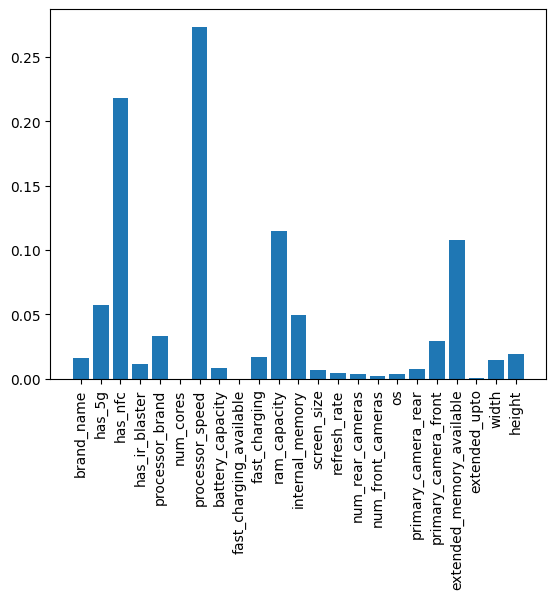

In [71]:
best = gs.best_estimator_
best.fit(X, y)
plt.bar(best.get_booster().feature_names, best.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [72]:
model = best

# 7. Testing Prediction Model

In [89]:
sample = pd.Series({'brand_name': np.nan,'has_5g': True,'has_nfc': True, 'has_ir_blaster': np.nan, 'processor_brand':np.nan,
                   'num_cores': 8,'processor_speed':3,'battery_capacity': 5000,
                    'fast_charging_available': np.nan, 'fast_charging': np.nan,'ram_capacity': 8,
                    'internal_memory': np.nan, 'screen_size': np.nan, 'refresh_rate': 144, 'num_rear_cameras': np.nan,
                    'num_front_cameras': np.nan, 'os':'android', 'primary_camera_rear': np.nan,
                    'primary_camera_front': np.nan, 'extended_memory_available': np.nan, 'extended_upto':np.nan,
                    'width': np.nan, 'height': np.nan
                   },
            index=['brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand',
                   'num_cores', 'processor_speed', 'battery_capacity',
                   'fast_charging_available', 'fast_charging', 'ram_capacity',
                   'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
                   'num_front_cameras', 'os', 'primary_camera_rear',
                   'primary_camera_front', 'extended_memory_available', 'extended_upto',
                   'width', 'height'])

sample_array = pd.DataFrame([sample], columns=sample.index )
sample_array[categorical_features] = sample_array[categorical_features].astype('category')
sample_array

,brand_name,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,width,height
0,NaN,True,True,NaN,NaN,8,3,5000,NaN,NaN,8,NaN,NaN,144,NaN,NaN,android,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
predicted_price = model.predict(sample_array)[0]
predicted_price

737.3292

In [91]:
actual_prices = df[
    (df['has_5g'] == sample['has_5g']) & (df['num_cores']== sample['num_cores']) &
     (df['ram_capacity']== sample['ram_capacity']) & (df['os']==sample['os']) & (df['refresh_rate']==sample['refresh_rate']) &
      ((df['processor_speed']<=sample['processor_speed']-0.2) | (df['processor_speed']>=sample['processor_speed']+0.2)) &
       ((df['battery_capacity']<=sample['battery_capacity']-200) | (df['battery_capacity']>=sample['battery_capacity']+200))]['price']

print(f"Mean: {round(actual_prices.mean(),2)}, std:{round(actual_prices.std(),2)}, Median: {actual_prices.median()}")

Mean: 546.78, std:157.33, Median: 515.88


In [93]:
df[
    (df['has_5g'] == sample['has_5g']) & (df['num_cores']== sample['num_cores']) &
     (df['ram_capacity']== sample['ram_capacity']) & (df['os']==sample['os']) & (df['refresh_rate']==sample['refresh_rate']) &
      ((df['processor_speed']<=sample['processor_speed']+0.2) | (df['processor_speed']>=sample['processor_speed']-0.2)) &
       ((df['battery_capacity']<=sample['battery_capacity']+200) | (df['battery_capacity']>=sample['battery_capacity']-200))
       ]

,brand_name,model,price,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,width,height
97,iqoo,iQOO 11 5G,719.99,True,True,False,snapdragon,8.0,3.20,5000.0,True,120.0,8.0,256.0,6.78,144,1440 x 3200,3,1.0,android,50.0,16.0,False,NaN,1440,3200
102,motorola,Motorola Moto S30 Pro,287.88,True,False,False,snapdragon,8.0,2.90,4400.0,True,68.0,8.0,128.0,6.55,144,1080 x 2460,3,1.0,android,50.0,32.0,False,NaN,1080,2460
120,motorola,Motorola Edge 30 Pro 5G,419.99,True,True,False,snapdragon,8.0,3.00,4800.0,True,68.0,8.0,128.0,6.70,144,1080 x 2400,3,1.0,android,50.0,60.0,False,NaN,1080,2400
193,motorola,Motorola Edge 30 Fusion 5G,479.99,True,True,False,snapdragon,8.0,2.90,4400.0,True,68.0,8.0,128.0,6.55,144,1080 x 2400,3,1.0,android,50.0,32.0,False,NaN,1080,2400
201,motorola,Motorola Edge 30 Ultra,659.99,True,True,False,snapdragon,8.0,3.20,4610.0,True,125.0,8.0,128.0,6.67,144,1080 x 2400,3,1.0,android,200.0,60.0,False,NaN,1080,2400
222,motorola,Motorola Edge 30 5G (8GB RAM + 128GB),299.99,True,True,False,snapdragon,8.0,2.50,4020.0,True,33.0,8.0,128.0,6.50,144,1080 x 2400,3,1.0,android,50.0,32.0,False,NaN,1080,2400
230,iqoo,iQOO 11 Pro 5G,707.88,True,True,True,snapdragon,8.0,3.20,4700.0,True,200.0,8.0,256.0,6.78,144,1440 x 3200,3,1.0,android,50.0,16.0,False,NaN,1440,3200
299,xiaomi,Xiaomi Redmi K50i (8GB RAM + 256GB),311.99,True,False,True,dimensity,8.0,2.85,5080.0,True,67.0,8.0,256.0,6.60,144,1080 x 2460,3,1.0,android,64.0,16.0,False,NaN,1080,2460
316,poco,POCO X5 GT,359.88,True,True,True,dimensity,8.0,3.20,5000.0,True,80.0,8.0,128.0,6.70,144,1080 x 2400,3,1.0,android,64.0,32.0,False,NaN,1080,2400
332,realme,Realme 9 5G SE (8GB RAM + 128GB),275.98,True,False,False,snapdragon,8.0,2.40,5000.0,True,30.0,8.0,128.0,6.60,144,1080 x 2412,3,1.0,android,48.0,16.0,True,1024.0,1080,2412
